In [259]:
# This Notebook is for measuring the popularity of test items
from experiments.data_loader import DataLoader
from shared.enums import Sentiment
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import seaborn as sns

data_loader = DataLoader('../../data/default/split_0')

entity_ratings = dict()

for user, ratings in data_loader.training().items():
    for item, rating in ratings.training.items():
        entity_ratings[item] = entity_ratings.get(item, 0) + 1
        pass

print(entity_ratings)

{12779: 324, 18694: 175, 14398: 403, 11928: 427, 5536: 369, 5551: 30, 8496: 544, 8652: 158, 3807: 605, 8832: 315, 4520: 39, 12820: 530, 3033: 108, 6753: 52, 6608: 70, 16037: 45, 16283: 28, 16068: 12, 10900: 73, 9839: 9, 16143: 39, 10163: 69, 16814: 31, 9666: 3, 2232: 1, 3863: 634, 14759: 607, 5484: 412, 16949: 535, 14874: 201, 4874: 5, 2882: 80, 1196: 40, 12889: 33, 7087: 202, 16446: 41, 9987: 15, 76: 28, 100: 54, 89: 18, 10266: 8, 13882: 11, 8525: 9, 2826: 6, 11950: 9, 6651: 9, 4948: 16, 18370: 5, 12397: 6, 5837: 7, 14402: 9, 9031: 17, 18347: 2, 625: 1, 4849: 1, 5694: 1, 14537: 70, 11134: 49, 1741: 35, 18113: 255, 2083: 133, 9690: 32, 16438: 29, 9636: 71, 4762: 284, 17226: 288, 8107: 45, 12052: 8, 4443: 13, 13800: 76, 18554: 21, 18552: 37, 16066: 33, 16215: 15, 16321: 126, 12196: 89, 4688: 25, 4194: 8, 3837: 33, 3200: 21, 6303: 21, 8238: 8, 14603: 24, 6689: 15, 17748: 32, 17802: 20, 8307: 30, 8631: 12, 8058: 8, 13201: 16, 17569: 24, 11045: 4, 1180: 23, 10896: 30, 17792: 18, 9073: 20, 

DescribeResult(nobs=241, minmax=(0, 108), mean=21.04564315352697, variance=435.5270746887967, skewness=1.6074683496443418, kurtosis=2.8983178431958407)
np.median(positive_ratings)=14.0
DescribeResult(nobs=24100, minmax=(0, 108), mean=11.328381742738589, variance=140.3673673964881, skewness=1.745288892048119, kurtosis=3.8668294833541568)
np.median(unseen_ratings)=7.0
12.0
0.0


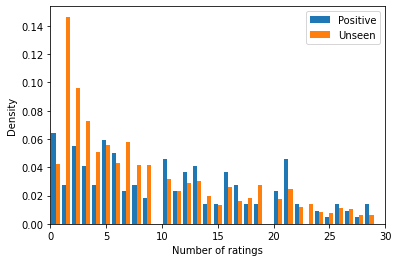

In [260]:
# How popular are positive items compared to unseen samples

positive_ratings = list()
unseen_ratings = list()

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        unseen_items = cold_set.ranking.sentiment_samples[Sentiment.UNSEEN]
        
        for item in positive_items:
            positive_ratings.append(entity_ratings.get(item, 0))
            
        for item in unseen_items:
            unseen_ratings.append(entity_ratings.get(item, 0))
                
        break
            
print(stats.describe(positive_ratings))
print(f'{np.median(positive_ratings)=}')
print(stats.describe(unseen_ratings))
print(f'{np.median(unseen_ratings)=}')

print(f'{np.percentile(positive_ratings, 45)}')
print(f'{np.percentile(unseen_ratings, 3)}')
plt.hist([positive_ratings, unseen_ratings], bins=119, label=['Positive', 'Unseen'], density=True)
plt.legend(loc='upper right')
plt.xlabel('Number of ratings')
plt.ylabel('Density')
plt.xlim([0, 30])
plt.savefig('sampling_popularity_bias.pdf', bbox_inches='tight')

In [261]:
# How many unique positive samples we have per test user
test_ratings = dict()
unseen_ratings = dict()
lengths = []

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        
        items.update(positive_items)

    lengths.append(len(items))

print(stats.describe(lengths))

DescribeResult(nobs=241, minmax=(2, 10), mean=6.265560165975104, variance=2.7041839557399725, skewness=0.04360209531286381, kurtosis=-0.26455514252337986)
